# Author: Mayur Rajendrakumar Ghate
## Task - 7: Stock Market Prediction using Numerical and Textual Analysis
## *Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.*
## The Sparks Foundation
### Graduate Rotational Internship Program (GRIP) June 2021 Batch
### Data Science & Business Analytics Tasks

# Import the Important Libraries

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# For Time Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# For Sentiment Analysis
import nltk
import re
from textblob import TextBlob

In [2]:
# For time stamps
from datetime import datetime

In [3]:
# Load the first dataset
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)

In [4]:
print('Showing part of the whole dataset:')
ndf.head(5)

Showing part of the whole dataset:


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [5]:
# Dropping Category Column
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3424058,20201231,50 NRIs reach Singhu; offer help to farmers
3424059,20201231,Navjot Singh Sidhu tweets apology; says 'wore ...
3424060,20201231,Azim Premji organisation's name misused to che...
3424061,20201231,Get govt nod to probe officials: MP to agencies


In [7]:
# Load the second dataset
# Here I am fetching data from Yahoo Finance Website
import yfinance as yf

# SENSEX (S&P BSE SENSEX)
msft = yf.Ticker("^BSESN")

# get stock info
print(msft.info)

# get historical market data
hisdf = msft.history(period="5y")
hisdf.head(-5)

{'previousClose': 52323.33, 'regularMarketOpen': 52568.07, 'twoHundredDayAverage': 49408.844, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 52586.41, 'navPrice': None, 'averageDailyVolume10Day': 10985, 'totalAssets': None, 'regularMarketPreviousClose': 52323.33, 'fiftyDayAverage': 50884.35, 'trailingAnnualDividendRate': None, 'open': 52568.07, 'toCurrency': None, 'averageVolume10days': 10985, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 51601.11, 'priceHint': 2, 'currency': 'INR', 'regularMarketVolume': 0, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 13244, 'priceToSalesTrailing12Months': None, 'dayLow': 51601.11, 'ask': 0, 'ytdReturn': None, 'askSize': 0, 'volume': 0, 'fiftyTwoWeekHigh': 52869.

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-20,26497.109375,26885.490234,26447.880859,26866.919922,9500,0,0
2016-06-21,26907.419922,26925.640625,26754.599609,26812.779297,7000,0,0
2016-06-22,26791.679688,26887.289062,26617.449219,26765.650391,7700,0,0
2016-06-23,26753.199219,27060.980469,26736.519531,27002.220703,9300,0,0
2016-06-24,26367.480469,26435.849609,25911.330078,26397.710938,24400,0,0
...,...,...,...,...,...,...,...
2021-06-07,52231.378906,52378.691406,52054.761719,52328.511719,19800,0,0
2021-06-08,52428.718750,52432.429688,52135.039062,52275.570312,12300,0,0
2021-06-09,52401.410156,52446.921875,51717.070312,51941.640625,15200,0,0


# Common Dataset Exploration

In [8]:
# Check for common information of the first datast
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 78.4+ MB


In [9]:
# Group the headlines for each day
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace=True,drop=True)

In [10]:
ndf

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [11]:
# Check for any duplicated values or Null Value
ndf.isnull().sum()

Date    0
News    0
dtype: int64

In [12]:
# Size of Dataset
len(ndf)

7262

In [13]:
# From Stock data accese only below listed column
hisdf=hisdf[["Open","High","Low","Close","Volume"]]
hisdf.head(-5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-20,26497.109375,26885.490234,26447.880859,26866.919922,9500
2016-06-21,26907.419922,26925.640625,26754.599609,26812.779297,7000
2016-06-22,26791.679688,26887.289062,26617.449219,26765.650391,7700
2016-06-23,26753.199219,27060.980469,26736.519531,27002.220703,9300
2016-06-24,26367.480469,26435.849609,25911.330078,26397.710938,24400
...,...,...,...,...,...
2021-06-07,52231.378906,52378.691406,52054.761719,52328.511719,19800
2021-06-08,52428.718750,52432.429688,52135.039062,52275.570312,12300
2021-06-09,52401.410156,52446.921875,51717.070312,51941.640625,15200


In [14]:
# Check for common information of the second dataset
hisdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2016-06-20 to 2021-06-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1228 non-null   float64
 1   High    1228 non-null   float64
 2   Low     1228 non-null   float64
 3   Close   1228 non-null   float64
 4   Volume  1228 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.6 KB


In [15]:
hisdf.describe()

,Open,High,Low,Close,Volume
count,1228.000000,1228.000000,1228.000000,1228.000000,1.228000e+03
mean,36119.149766,36290.558802,35860.534165,36071.552936,2.741845e+05
std,6286.983285,6311.661857,6228.530717,6276.912610,2.124576e+06
min,25815.429688,26008.570312,25638.900391,25765.140625,1.000000e+02
25%,31643.171875,31755.242188,31375.154785,31583.542969,1.077500e+04
50%,35668.000000,35798.410156,35450.523438,35628.544922,1.470000e+04
75%,39078.763672,39235.196289,38820.983398,39023.180664,2.032500e+04
max,52782.210938,52869.511719,52671.289062,52773.050781,3.181510e+07


In [16]:
# Check for duplicated values
hisdf.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [17]:
# Total Size of Second Dataset
len(hisdf)

1228

Text(0, 0.5, 'BSESN')

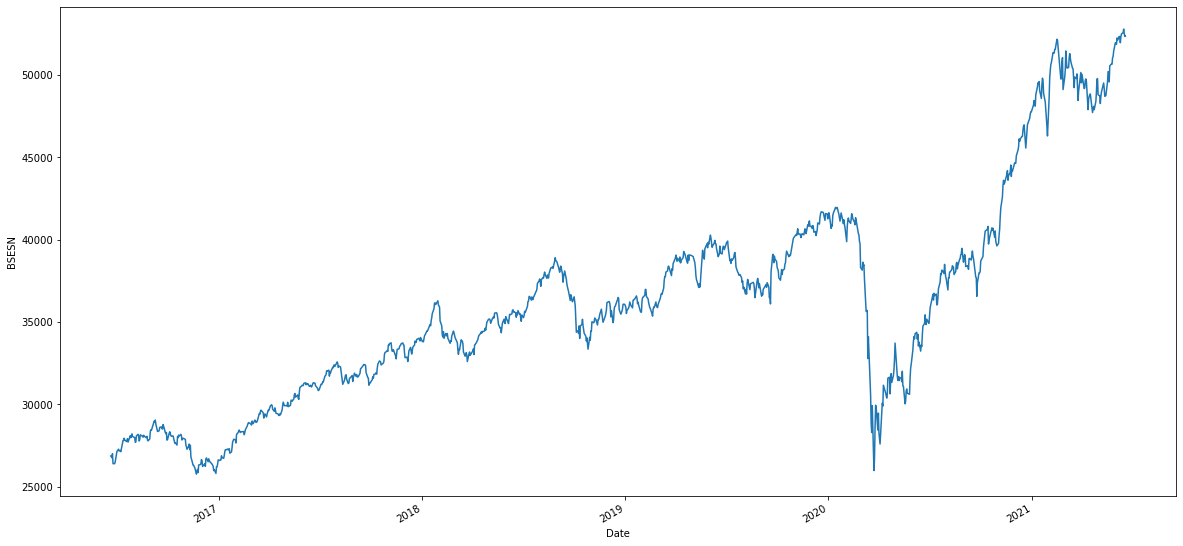

In [18]:
# Figure plot
plt.figure(figsize=(20,10))
hisdf['Close'].plot()
plt.ylabel('BSESN')

# Remove Unwanted Characters from the News

In [19]:
#removing unwanted characters from the News
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

# Historical Analysis

# Plot the Moving Average

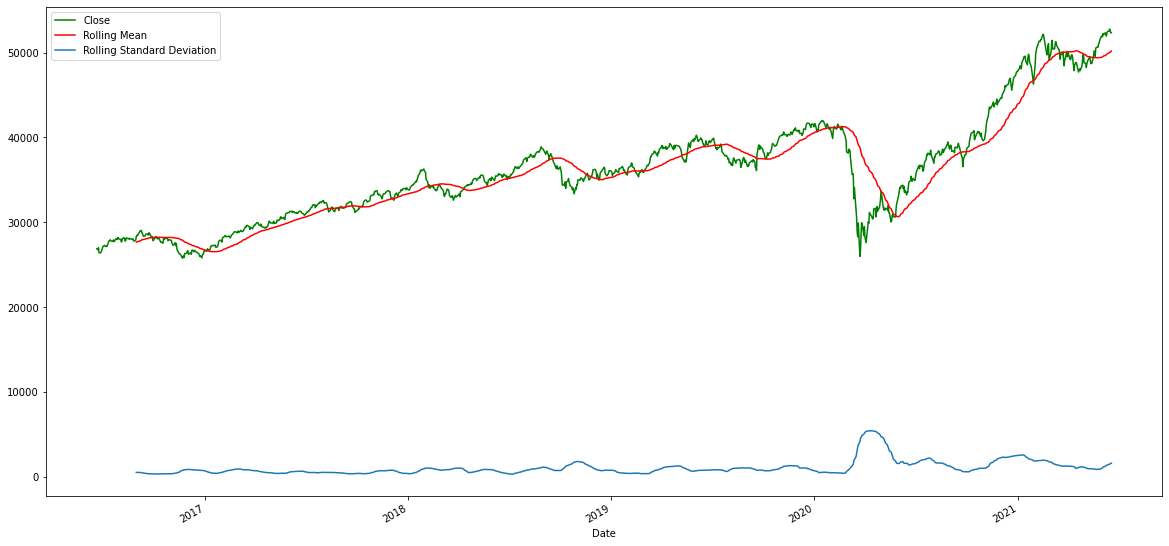

In [20]:
#Plotting moving average
close = hisdf['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
hisdf['Close'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

# Plot the Returns

Text(0.5, 1.0, 'Returns')

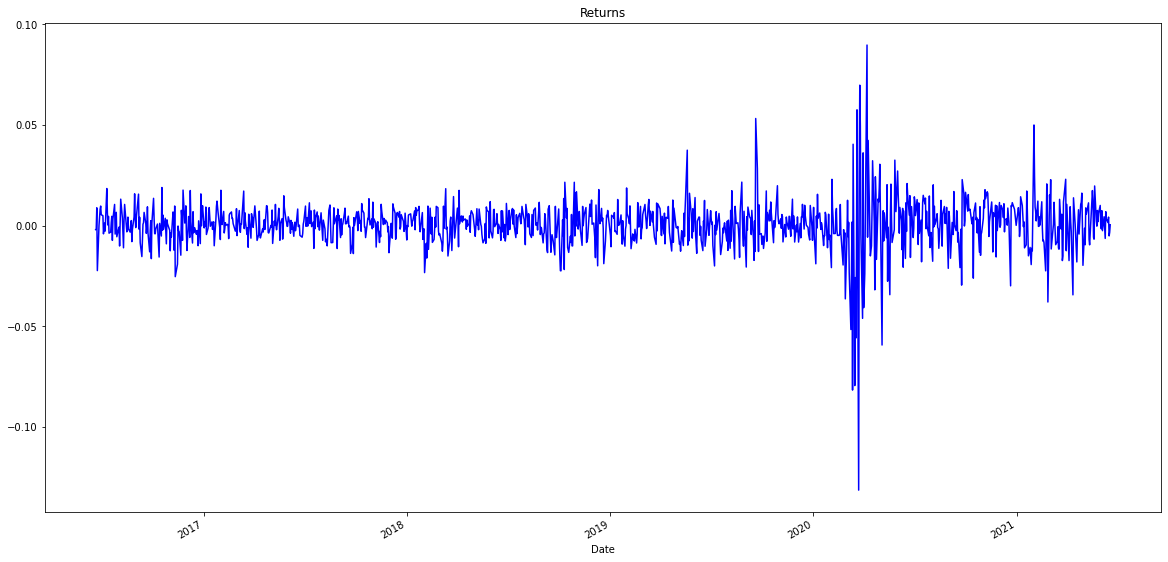

In [21]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'b')
plt.title("Returns")

In [29]:
# Train test split
train = hisdf[:1218]
test = hisdf[1218:]

# Rolling mean and Standard Deviation

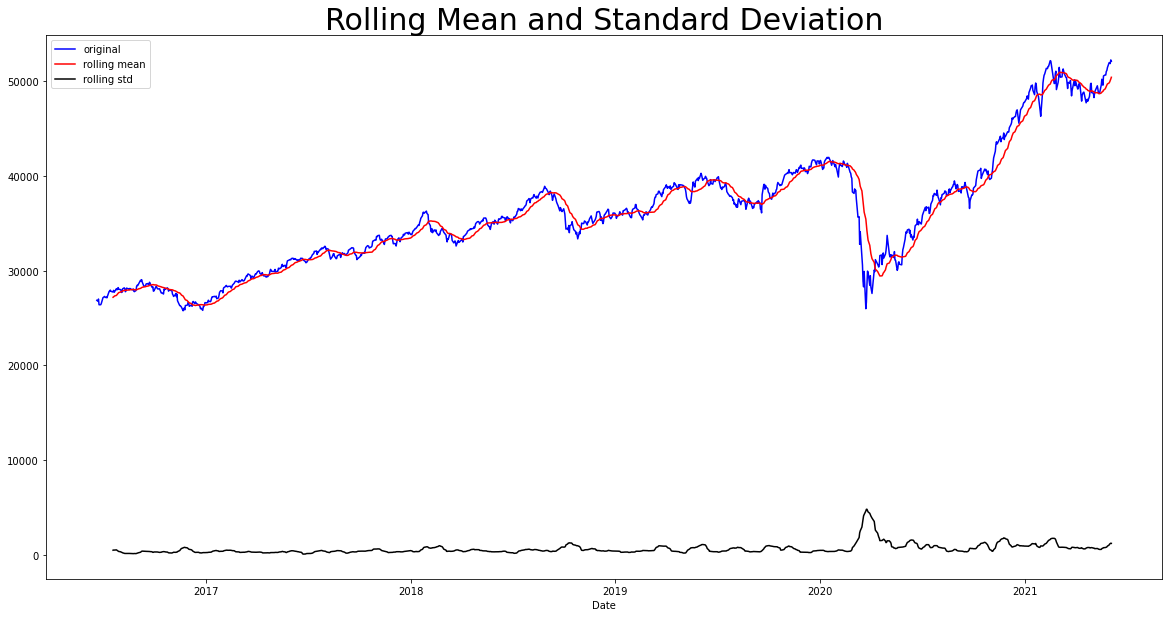

Results of dickey fuller test
ADF Test Statistic : -0.35351179570588265
p-value : 0.9175760952973182
#Lags Used : 11
Number of Observations Used : 1206
Weak evidence against null hypothesis, time series is non-stationary 


In [30]:
#Stationarity test
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(21).mean()
 rolstd = timeseries.rolling(21).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 from statsmodels.tsa.stattools import adfuller
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

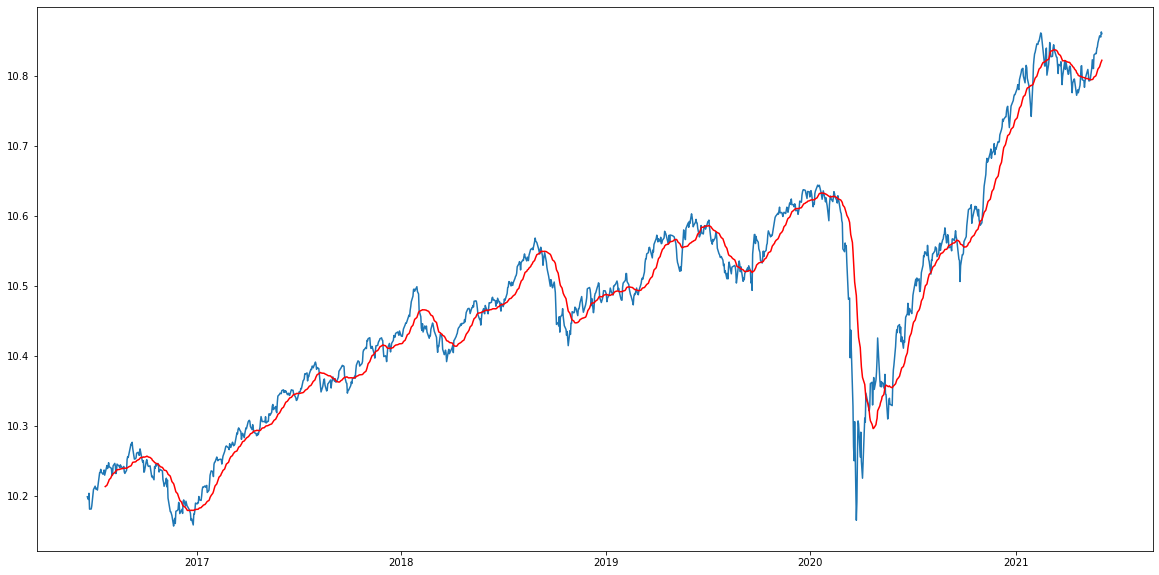

In [31]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

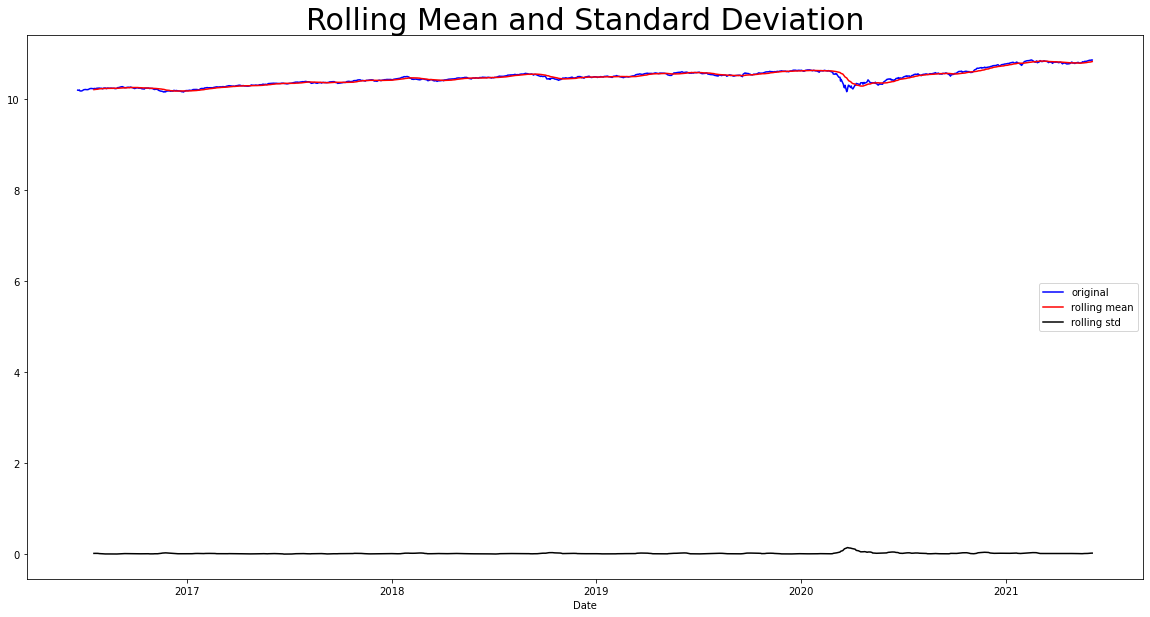

Results of dickey fuller test
ADF Test Statistic : -0.7909038979181707
p-value : 0.8217793874533599
#Lags Used : 14
Number of Observations Used : 1203
Weak evidence against null hypothesis, time series is non-stationary 


In [32]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

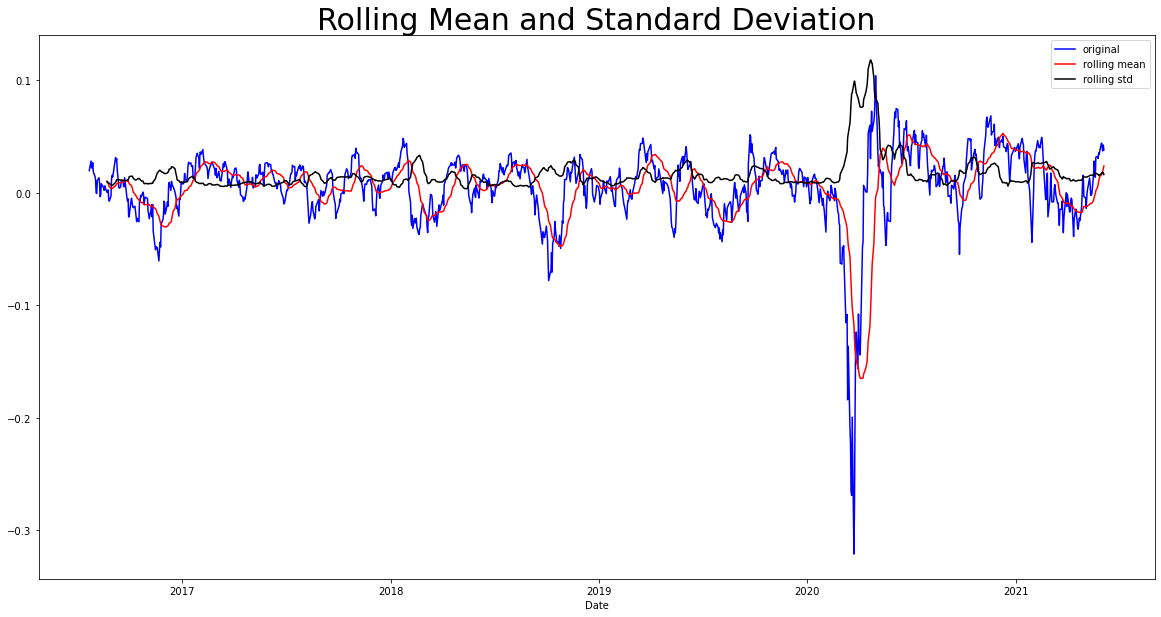

Results of dickey fuller test
ADF Test Statistic : -6.439809380867562
p-value : 1.6186426154128253e-08
#Lags Used : 14
Number of Observations Used : 1180
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [33]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [34]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima

In [35]:
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7339.498, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7341.926, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7344.797, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7344.547, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7341.354, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7343.467, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7343.171, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7342.759, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7343.882, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.475 seconds


Text(0, 0.5, 'Actual Stock Price')

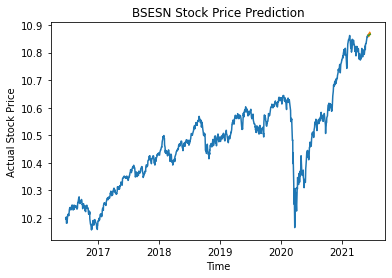

In [36]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

# Error Calculation

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.004219448810839434


# Textual Analysis

In [39]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [40]:
#Adding subjectivity and polarity columns
ndf['Subjectivity'] = ndf['News'].apply(getSubjectivity)
ndf['Polarity'] = ndf['News'].apply(getPolarity)
ndf

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...,0.392082,0.042978
7258,2020-12-28,Horoscope Today December Check astro...,0.409973,0.071405
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.415684,0.060775
7260,2020-12-30,Numerology Readings December Predicti...,0.436863,0.046930


In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

In [44]:
ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['News']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['News']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['News']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['News']]
ndf

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7257,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...,0.392082,0.042978,-0.9997,0.132,0.787,0.082
7258,2020-12-28,Horoscope Today December Check astro...,0.409973,0.071405,-0.9998,0.143,0.758,0.098
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.415684,0.060775,-0.9999,0.154,0.748,0.098
7260,2020-12-30,Numerology Readings December Predicti...,0.436863,0.046930,-0.9999,0.150,0.764,0.086


# Merge the Historical and Textual Data

In [45]:
df_merge = pd.merge(hisdf, ndf, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2016-06-20,26497.109375,26885.490234,26447.880859,26866.919922,9500,nd T I Wounded India eye fightback against ...,0.375533,0.053303,-0.9999,0.168,0.740,0.091
1,2016-06-21,26907.419922,26925.640625,26754.599609,26812.779297,7000,Newbie not Priyanka Chopra opposite Shah Ruk...,0.352304,0.072595,-0.9999,0.159,0.748,0.093
2,2016-06-22,26791.679688,26887.289062,26617.449219,26765.650391,7700,things happy couples do differently Exercise...,0.396892,0.084414,-0.9999,0.144,0.757,0.099
3,2016-06-23,26753.199219,27060.980469,26736.519531,27002.220703,9300,Barun Sobti and Rajesh Sharma team up for next...,0.409283,0.059844,-0.9999,0.163,0.736,0.102
4,2016-06-24,26367.480469,26435.849609,25911.330078,26397.710938,24400,Power diet for quick weight loss celebs sho...,0.365564,0.070482,-0.9999,0.169,0.726,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,13700,How to set the mood for sex during cold winter...,0.387011,0.053569,-0.9988,0.096,0.833,0.071
1112,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,9600,Horoscope Today December Check astro...,0.409973,0.071405,-0.9998,0.143,0.758,0.098
1113,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,12800,Man recovers charred remains of 'thief' from h...,0.415684,0.060775,-0.9999,0.154,0.748,0.098
1114,2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,15600,Numerology Readings December Predicti...,0.436863,0.046930,-0.9999,0.150,0.764,0.086


# Create Dataset for Model Training

In [46]:
dfmerge1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,26866.919922,0.375533,0.053303,-0.9999,0.168,0.740,0.091
1,26812.779297,0.352304,0.072595,-0.9999,0.159,0.748,0.093
2,26765.650391,0.396892,0.084414,-0.9999,0.144,0.757,0.099
3,27002.220703,0.409283,0.059844,-0.9999,0.163,0.736,0.102
4,26397.710938,0.365564,0.070482,-0.9999,0.169,0.726,0.105
...,...,...,...,...,...,...,...
1111,46973.539062,0.387011,0.053569,-0.9988,0.096,0.833,0.071
1112,47353.750000,0.409973,0.071405,-0.9998,0.143,0.758,0.098
1113,47613.078125,0.415684,0.060775,-0.9999,0.154,0.748,0.098
1114,47746.218750,0.436863,0.046930,-0.9999,0.150,0.764,0.086


# Normalize Data

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.050112,0.338718,0.469345,0.00005,0.614173,0.275862,0.413793
1,0.047650,0.163125,0.611385,0.00005,0.543307,0.331034,0.436782
2,0.045506,0.500165,0.698410,0.00005,0.425197,0.393103,0.505747
3,0.056266,0.593831,0.517500,0.00005,0.574803,0.248276,0.540230
4,0.028771,0.263361,0.595827,0.00005,0.622047,0.179310,0.574713


# Assigning Features(X) & Labels(Y)

In [49]:
X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.338718,0.469345,0.00005,0.614173,0.275862,0.413793
1,0.163125,0.611385,0.00005,0.543307,0.331034,0.436782
2,0.500165,0.698410,0.00005,0.425197,0.393103,0.505747
3,0.593831,0.517500,0.00005,0.574803,0.248276,0.540230
4,0.263361,0.595827,0.00005,0.622047,0.179310,0.574713
...,...,...,...,...,...,...
1111,0.425477,0.471297,0.00060,0.047244,0.917241,0.183908
1112,0.599046,0.602627,0.00010,0.417323,0.400000,0.494253
1113,0.642216,0.524355,0.00005,0.503937,0.331034,0.494253
1114,0.802298,0.422420,0.00005,0.472441,0.441379,0.356322


In [50]:
Y=df['Close']
Y

0       0.050112
1       0.047650
2       0.045506
3       0.056266
4       0.028771
          ...   
1111    0.964624
1112    0.981917
1113    0.993712
1114    0.999768
1115    1.000000
Name: Close, Length: 1116, dtype: float64

# Split the Dataset into Train & Test Data

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(892, 6)

In [93]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
877,0.549093,0.433499,0.00005,0.480315,0.510345,0.229885
775,0.634373,0.436261,0.00050,0.196850,0.627586,0.459770
1083,0.602195,0.702624,0.00020,0.346457,0.448276,0.540230
658,0.563264,0.541559,0.00000,0.826772,0.075862,0.436782
622,0.457996,0.274155,0.00010,0.354331,0.496552,0.436782
751,0.490117,0.436207,0.00005,0.582677,0.317241,0.413793
819,0.567632,0.419566,0.00010,0.433071,0.441379,0.413793
788,0.443385,0.706490,0.00010,0.488189,0.268966,0.620690
921,0.333438,0.287850,0.00005,0.503937,0.620690,0.011494
874,0.333296,0.783567,0.00005,0.606299,0.282759,0.425287


# 1. Random Forest Regressor Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [96]:
print(prediction[:10])
print(y_test[:10])
mserfr=(mean_squared_error(prediction,y_test))
print(mserfr)

[0.48464086 0.27602289 0.44151133 0.31799108 0.2394696  0.36318867
 0.25917577 0.47099957 0.46126787 0.3248865 ]
923     0.041339
736     0.604070
187     0.162239
897     0.713841
413     0.364298
501     0.429905
546     0.585819
1076    0.659323
960     0.235046
268     0.279233
Name: Close, dtype: float64
0.039233432997325436


# 2. Decision Tree Regressor Model

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [99]:
print(predictions[:10])
print(y_test[:10])
msedtr=(mean_squared_error(predictions,y_test))
print(msedtr)

[0.41620041 0.11169921 0.48514692 0.3810123  0.07704153 0.46704732
 0.71050326 0.4495914  0.14390809 0.35513561]
923     0.041339
736     0.604070
187     0.162239
897     0.713841
413     0.364298
501     0.429905
546     0.585819
1076    0.659323
960     0.235046
268     0.279233
Name: Close, dtype: float64
0.07472774091262332


# 3. Ada Boost Regressor Model

In [100]:
from sklearn.ensemble import AdaBoostRegressor

In [101]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [102]:
predictions = adb.predict(x_test)
mseabr=(mean_squared_error(predictions, y_test))
print(mseabr)

0.03893993281324678


# 4. LGBM Regressor Model

In [103]:
import lightgbm

In [104]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor()

In [105]:
predictions = gbm.predict(x_test)
mselgbmr=(mean_squared_error(predictions, y_test))
print(mselgbmr)

0.04255931238190199


# 5. XGB Regressor Model

In [106]:
import xgboost

In [107]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
predictions = xgb.predict(x_test)
msexgbr=(mean_squared_error(predictions, y_test))
print(msexgbr)

0.04639049025891078


# Conclusion :

In [111]:
models=pd.DataFrame({
    'Model':['RandomForest','DecisionTree','AdaBoost','LightGBM','XGBoost'],
    'Mean_Squared_Error':[mserfr, msedtr, mseabr, mselgbmr, msexgbr]})
models.sort_values(by='Mean_Squared_Error',ascending=True)

,Model,Mean_Squared_Error
2,AdaBoost,0.038940
0,RandomForest,0.039233
3,LightGBM,0.042559
4,XGBoost,0.046390
1,DecisionTree,0.074728


**From here we can see that AdaBoostRegressor shows a better performance than the others**

**Thank You...**